## Missing Data

In [1]:
from sklearn.preprocessing import Imputer
imp = Imputer()
imp.fit_transform([[1,2,'nan'],[1,2,3]])

/usr/local/lib/python2.7/dist-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


array([[1., 2., 3.],
       [1., 2., 3.]])

## Encoding
Converting string and categorical data to boolean or integers that machine can understand easily.

In [2]:
from sklearn.preprocessing import OrdinalEncoder,OneHotEncoder
OrdinalEncoder().fit_transform([['Male','India'],['Female','US'],['Male','Canada'],['Female','India']])

array([[1., 1.],
       [0., 2.],
       [1., 0.],
       [0., 1.]])

In [3]:
OneHotEncoder().fit_transform([['Male','India'],['Female','US'],['Male','Canada'],['Female','India']]).toarray()

array([[0., 1., 0., 1., 0.],
       [1., 0., 0., 0., 1.],
       [0., 1., 1., 0., 0.],
       [1., 0., 0., 1., 0.]])

## Feature Scaling

A lot of algorithms work by calculating distance between 2 points, and sometimes the range of values of raw data varies widely, this results in less accurate predictions. To solve this, we use feature scaling i.e. Limit the range of raw data by Standard Scalar or Min-Max Scalar.

In [4]:
from sklearn import preprocessing
import numpy as np
import pandas as pd

In [5]:
X_train = np.array([[ 1., -1.,  2.],
                    [ 2.,  0.,  0.],
                    [ 0.,  1., -1.]])

### Standard Scalar
* will scale data such that the distribution is now centred around 0, with a standard deviation of 1
* x(i) = ( x(i) - x(mean) ) / x(std)

In [6]:
standard_scaler = preprocessing.StandardScaler()
standard_scaler.fit_transform(X_train)

array([[ 0.        , -1.22474487,  1.33630621],
       [ 1.22474487,  0.        , -0.26726124],
       [-1.22474487,  1.22474487, -1.06904497]])

In [7]:
standard_scaler.var_

array([0.66666667, 0.66666667, 1.55555556])

In [8]:
standard_scaler.mean_

array([1.        , 0.        , 0.33333333])

In [9]:
X_train[:,2].mean()

0.3333333333333333

### Min-Max Scalar
* shrinks the range such that the range is now between 0 and 1 (can be set for a different range).
* x(i) = ( max - x(i) ) / ( max - min )

In [10]:
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(-2, 10))
min_max_scaler.fit_transform(X_train)

array([[ 4., -2., 10.],
       [10.,  4.,  2.],
       [-2., 10., -2.]])

## Dimensionality Reduction
* there are often too many factors on the basis of which the final classification is done
* these factors are basically variables called features
* the higher the number of features, the harder it gets to visualize the training set and then work on it
* Sometimes, most of these features are correlated, and hence redundant. 

**Dimensionality reduction is the process of reducing the number of random variables under consideration, by obtaining a set of principal variables.**

#### Advantages
* It helps in data compression, and hence reduced storage space.
* It reduces computation time.
* It also helps remove redundant features, if any.

#### Disadvantages
* It may lead to some amount of data loss.

### Principal Component Analysis

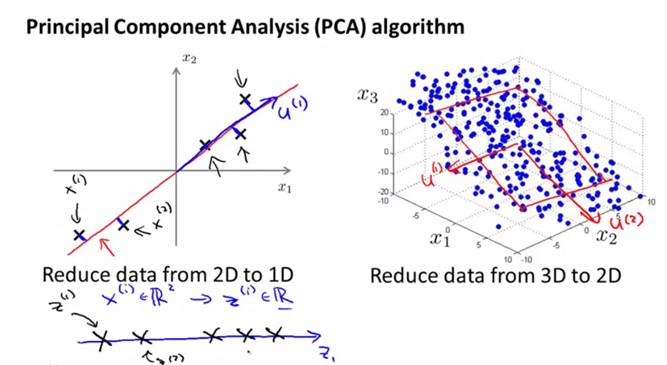

In [11]:
np.corrcoef([2,2,2,2],[1,1,2,2])

/usr/local/lib/python2.7/dist-packages/numpy/lib/function_base.py:2400: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/usr/local/lib/python2.7/dist-packages/numpy/lib/function_base.py:2401: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


array([[nan, nan],
       [nan,  1.]])

### Applying PCA on Iris Dataset

In [12]:
from sklearn.datasets import load_iris
iris = load_iris()

In [13]:
pd.DataFrame(data= np.c_[iris['data'], iris['target']],columns= iris['feature_names'] + ['target']).sample(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
22,4.6,3.6,1.0,0.2,0.0
31,5.4,3.4,1.5,0.4,0.0
48,5.3,3.7,1.5,0.2,0.0
62,6.0,2.2,4.0,1.0,1.0
12,4.8,3.0,1.4,0.1,0.0
65,6.7,3.1,4.4,1.4,1.0
137,6.4,3.1,5.5,1.8,2.0
20,5.4,3.4,1.7,0.2,0.0
119,6.0,2.2,5.0,1.5,2.0
94,5.6,2.7,4.2,1.3,1.0


In [14]:
x = pd.DataFrame(data= iris['data'],columns= iris['feature_names'])

In [15]:
x.plot.scatter(x='sepal length (cm)',y='sepal width (cm)',c=iris['target'],cmap='cool')

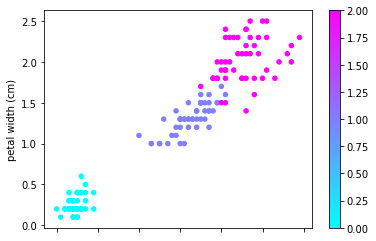

In [16]:
x.plot.scatter(x='petal length (cm)',y='petal width (cm)',c=iris['target'],cmap='cool')

In [17]:
x_scaled_np = preprocessing.StandardScaler().fit_transform(x.values)
x_scaled = pd.DataFrame(data= x_scaled_np,columns= iris['feature_names'])

In [18]:
x_scaled.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444
5,-0.537178,1.939791,-1.169714,-1.052180
6,-1.506521,0.788808,-1.340227,-1.183812
7,-1.021849,0.788808,-1.283389,-1.315444
8,-1.748856,-0.362176,-1.340227,-1.315444
9,-1.143017,0.098217,-1.283389,-1.447076


In [31]:
from sklearn.decomposition import PCA
pca = PCA().fit(x)
pca.explained_variance_ratio_*100

array([92.46187232,  5.30664831,  1.71026098,  0.52121839])

In [20]:
import matplotlib.pyplot as plt

Text(0,0.5,'Cumulative explained variance')

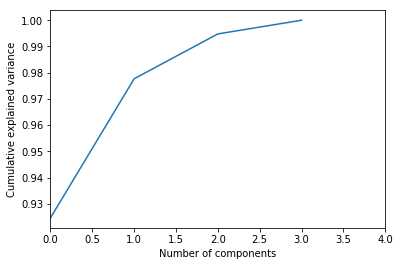

In [32]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlim(0,len(pca.explained_variance_ratio_),1)
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

In [22]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pc1 = pca.fit_transform(x)
pc2 = pca.fit_transform(x_scaled)
pcd1 = pd.DataFrame(data = pc1, columns = ['pc 1', 'pc 2'])
pcd2 = pd.DataFrame(data = pc2, columns = ['pc 1', 'pc 2'])

In [23]:
pcd1.head()

,pc 1,pc 2
0,-2.684126,0.319397
1,-2.714142,-0.177001
2,-2.888991,-0.144949
3,-2.745343,-0.318299
4,-2.728717,0.326755


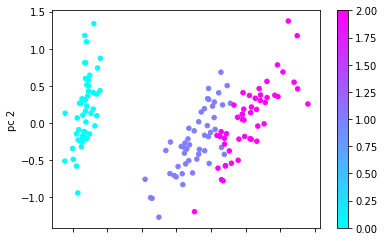

In [24]:
pcd1.plot.scatter(x='pc 1',y='pc 2',c=iris['target'],cmap='cool')

In [25]:
pcd2.head()

,pc 1,pc 2
0,-2.264703,0.480027
1,-2.080961,-0.674134
2,-2.364229,-0.341908
3,-2.299384,-0.597395
4,-2.389842,0.646835


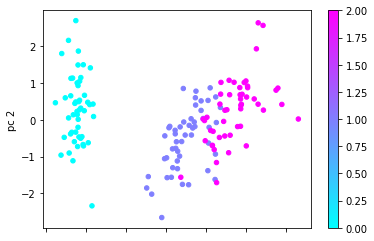

In [26]:
pcd2.plot.scatter(x='pc 1',y='pc 2',c=iris['target'],cmap='cool')

In [27]:
final_scaled_np = preprocessing.StandardScaler().fit_transform(pcd2.values)
pd.DataFrame(data= final_scaled_np,columns= ['pc1','pc2']).head()

,pc1,pc2
0,-1.325658,0.502094
1,-1.218104,-0.705124
2,-1.383916,-0.357626
3,-1.345959,-0.624857
4,-1.398909,0.676571


### Exercise
Clean dataset

In [33]:
import pandas as pd
data=pd.read_csv('../datasets/credit.csv')
data.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,'<0',6,'critical/other existing credit',radio/tv,1169,'no known savings','>=7',4,'male single',none,...,'real estate',67,none,own,2,skilled,1,yes,yes,good
1,'0<=X<200',48,'existing paid',radio/tv,5951,'<100','1<=X<4',2,'female div/dep/mar',none,...,'real estate',22,none,own,1,skilled,1,none,yes,bad
2,'no checking',12,'critical/other existing credit',education,2096,'<100','4<=X<7',2,'male single',none,...,'real estate',49,none,own,1,'unskilled resident',2,none,yes,good
3,'<0',42,'existing paid',furniture/equipment,7882,'<100','4<=X<7',2,'male single',guarantor,...,'life insurance',45,none,'for free',1,skilled,2,none,yes,good
4,'<0',24,'delayed previously','new car',4870,'<100','1<=X<4',3,'male single',none,...,'no known property',53,none,'for free',2,skilled,2,none,yes,bad


In [34]:
from sklearn.preprocessing import OrdinalEncoder,OneHotEncoder
edaa=pd.DataFrame(data=OrdinalEncoder().fit_transform(data), columns=list(data.columns.values))

In [43]:
OrdinalEncoder().fit_transform(data.iloc[:,1])

ValueError: Expected 2D array, got 1D array instead:
array=[ 6 48 12 42 24 36 24 36 12 30 12 48 12 24 15 24 24 30 24 24  9  6 10 12
 10  6  6 12  7 60 18 24 18 12 12 45 48 18 10  9 30 12 18 30 48 11 36  6
 11 12 24 27 12 18 36  6 12 36 18 36  9 15 36 48 24 27 12 12 36 36 36  7
  8 42 36 12 42 11 54 30 24 15 18 24 10 12 18 36 18 12 12 12 12 24 12 54
 12 18 36 20 24 36  6  9 12 24 18 12 24 14  6 15 18 36 12 48 42 10 33 12
 21 24 12 10 18 12 12 12 12 12 48 36 15 18 60 12 27 12 15 12  6 36 27 18
 21 48  6 12 36 18  6 10 36 24 24 12  9 12 24  6 24 18 15 10 36  6 18 11
 24 24 15 12 24  8 21 30 12  6 12 21 36 36 21 24 18 15  9 16 12 18 24 48
 27  6 45  9  6 12 24 18  9 12 27 12 12 30 12 12 24 12  9 36 27 30 36  6
 18 36 24 10 12 12 12 24 15 36 48 12  9 24 36  9 12 18  4 24  6 21 12 30
 24  6 48 12 12 24 12  6 24 18  6 12 30 24  9 60 24 12 15 11 12 24 18 12
 10 15 36 24 14 24 18 12 48 48 30  9 18 12  6 24 15 12 18 15 24 47 48 48
 12 24 12 36 24 42 48 48 12 10 18 21  6 36 24 10 48  6 30 12  8  9 48 24
 24 12  4 36 12 24 12 15 30 24 24 18 18  8 12 24 36  6 24 18 60 48 24  6
 13 15 24 10 24 21 18 18 10 15 13 24  6  9  9  9 18 12 10 24 12 36 12 30
 18 12 12  6 18 12 18 18 36 18 36 18 10 60 60 48 18  7 36  6 20 18 22 12
 30 18 18 18 15  9 18 12 36  6  9 39 12 36 12 24 18 18 24 14 18 24 24 15
 24 12 24 33 12 10 24 36 12 18 21 18 15 12 12 21 12 18 28 18  9 18  5 24
  6 24  9 12  6 24 42 12 12 12 20 12 48  9 36  7 12 15 36  6 12 24 24 24
 11 12  6 18 36 15 12 12 18 24 24 48 33 24 24  6  9  6 18 18 39 24 12 15
 12 24 30 15 12  6 12 24 10  6 12 27  6  6 12 24 36 24 18  6 24 36  9 24
 24 10 15 15 24 39 12 36 15 12 24  6  6 36  6  6 24 18 48 24 18 26 15  4
 36  6 36 15 12 24 24 21  6 18 48 18 12 24 30 18 12 24 24 24 12 48 12  6
 48 12  9 12 18 21 24 18 24 24  6 36 24 24 12 24 48 48 24 30 24 15  9 15
 12 24 36 24 18 12  9 36 12 18  9 12 18 12 12 24 21 24 24  6 24 24 18 24
  7  9 24 36 10 24 24 36 18 15 12 10 21 24 18 48 60  6 30 12 21 18 48 12
 18 15  6  9 42  9 24 18 15  9 24 12 24 60 12 42 18 15 15 24 18 36 30 12
 24 12 48 12 24 36 24 14 12 48 30 18 12 12 21  6  6 24 30 48 12 30 24 36
 60  6 21 30 24 72 24 18  6 12 15 24 36 60 10 36  9 12 15 15 24  6 24  6
 12 12 18 15 12 48 24 30 27 15 48 12  9  9 18  6 21  9 60 30 30 18 24 20
  9  6 12  9 27  6 15 18 48 24 24 24  8 24  4 36 24 18  6 30 24 10 21 24
 39 13 15 12 21 15  6 18 12 30 12 24  6 15 24 12 15 18 12 21 24 12 30 10
 12 12 24 36 21 24 12 24 36 18 36 18 39 24 12 12 20 18 22 48 48 40 21 24
  6 24 24  9 18 12 24  9 24 18 20 12 12 36  6 12 42 15  8  6 36 48 48 36
  6  6 36 18 12 12 36  8 18 21 18 18 36 48 24 18 45 24 15 12 12  4 24 24
 36 21 18 24 18 21 18 24  9 12 20 24 15 18 36 24 10 15 15  9 24 18 24 27
 10 15 18 12 36 12 36  6 24 15 12 11 18 36  9 30 24 24 30 18 24 12 24 48
 36 28 27 15 12 36 18 36 21 12 15 18 16 20 36 15 24 12 21 36 15  9 36 24
 30 11 24 48 10  6 24 24 18 48  9 12 24 12 18 48 30 12 24  9  9 12 12 30
  9  6 60 24 12 10 24  4 15 48 24 12 18 24 18 36 24 36 12 24 30  9 28 24
  6 21 15 24  6 30 27 15 42 11 15 24 24 60 30 24  6 18 24 15 30 48 21 36
 24 15 42 13 24 24 12 15 18 36 12 12 30 12 45 45].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [30]:
edaa.sample(10)

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
67,0.0,8.0,3.0,1.0,107.0,3.0,0.0,3.0,2.0,2.0,...,2.0,3.0,1.0,1.0,0.0,3.0,0.0,0.0,1.0,1.0
843,3.0,17.0,0.0,3.0,286.0,2.0,1.0,3.0,3.0,2.0,...,3.0,31.0,0.0,1.0,0.0,3.0,0.0,1.0,1.0,1.0
974,3.0,21.0,1.0,7.0,532.0,2.0,0.0,3.0,0.0,2.0,...,3.0,14.0,1.0,1.0,0.0,3.0,0.0,1.0,1.0,1.0
4,1.0,17.0,2.0,1.0,734.0,2.0,0.0,2.0,3.0,2.0,...,1.0,34.0,1.0,0.0,1.0,3.0,1.0,0.0,1.0,0.0
409,2.0,8.0,1.0,1.0,95.0,1.0,1.0,3.0,2.0,2.0,...,2.0,9.0,1.0,1.0,2.0,3.0,0.0,1.0,1.0,0.0
345,3.0,11.0,1.0,7.0,249.0,2.0,0.0,3.0,0.0,2.0,...,3.0,24.0,1.0,1.0,0.0,2.0,0.0,0.0,1.0,1.0
387,0.0,13.0,1.0,5.0,826.0,2.0,4.0,3.0,3.0,2.0,...,0.0,21.0,2.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0
688,3.0,5.0,3.0,7.0,517.0,0.0,3.0,2.0,3.0,0.0,...,3.0,16.0,1.0,1.0,0.0,3.0,0.0,1.0,1.0,1.0
130,0.0,29.0,3.0,1.0,861.0,4.0,1.0,0.0,0.0,2.0,...,3.0,5.0,1.0,1.0,0.0,3.0,0.0,0.0,1.0,1.0
111,2.0,11.0,3.0,4.0,8.0,2.0,2.0,3.0,0.0,2.0,...,0.0,4.0,1.0,2.0,0.0,3.0,0.0,1.0,1.0,1.0
